# SEIR MODEL

Next we will do the implementation of the SEIR model. This is an infectious model that maps the chainge in Susceptable, exposed, infected, recovered population to a virus

## Differential format implementation

Firstly import everything and set up the values to adjust

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from copy import deepcopy
mu = 0.05##death rate
delta = 0.05##increase in N
beta = 0.01##Transmission rate
alpha = 0.08##recovery rate
n=0.2

Set up the differential equation

In [3]:
##[S,E, I, R] will be the order

def sys_eq_2a(P, t=0):
    
    N= sum(P)
    #print(N)

    return np.array([
    delta*N-mu*P[0]-beta*P[0]*P[2],
    beta*P[0]*P[2]-(n+mu)*P[1],
    n*P[1]-(alpha + mu)*P[2],
    alpha*P[2]-mu*P[3]])

Complete the ODE int function and do the plotting

[[9.99000000e+02 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.99000014e+02 9.90042846e-01 9.92355317e-03 1.99053205e-05]
 [9.98995109e+02 9.85103721e-01 1.97085769e-02 7.91508773e-05]
 ...
 [1.60836861e+01 1.96660910e+02 3.05735121e+02 4.81520282e+02]
 [1.60848005e+01 1.96661323e+02 3.05714501e+02 4.81539376e+02]
 [1.60859076e+01 1.96661735e+02 3.05694018e+02 4.81558339e+02]]


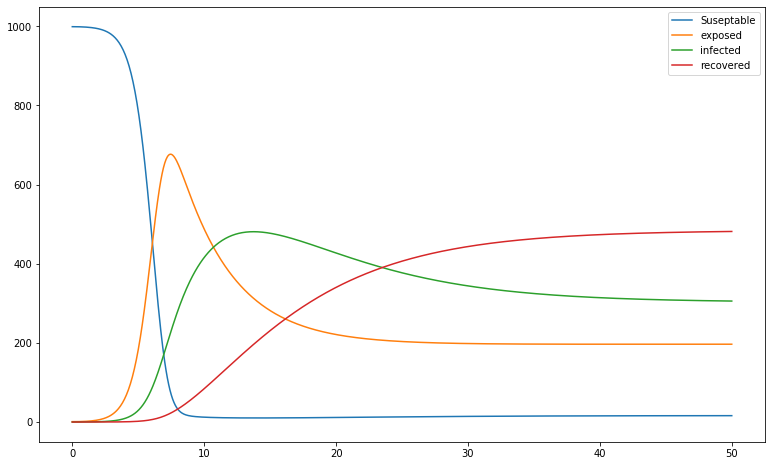

In [3]:
t= np.linspace(0,50, 1000)
##10000 points that are between 0 and 60
P0 = np.array([999,1, 0, 0])
P =odeint(sys_eq_2a, P0, t)

print(P)
S,E, I, R= P.T##this is then essentially the corresponding y pints given time
plt.figure(figsize=(13, 8))
plt.plot(t, S)
plt.plot(t, E)
plt.plot(t,I)
plt.plot(t,R)
plt.legend(["Suseptable", "exposed","infected", "recovered"])

Next we can plot the total population

Text(0.5, 1.0, 'Population')

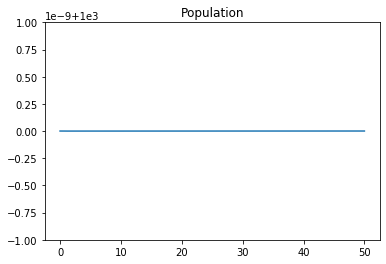

In [7]:
N_res=S+E+I+R
plt.plot(t,N_res)
plt.title("Population")

#### Demography not included

In [8]:
def sys_eq_2a_nomu(P, t=0):
    
    #N= sum(P)
    #print(N)

    return np.array([
    -beta*P[0]*P[2],
    beta*P[0]*P[2]-n*P[1],
    n*P[1]-alpha *P[2],
    alpha*P[2]])

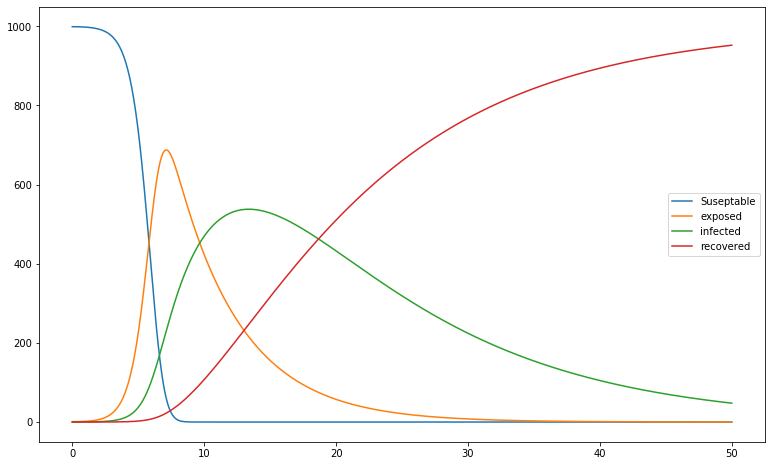

In [9]:
t= np.linspace(0,50, 1000)
##10000 points that are between 0 and 60
P0 = np.array([999,1, 0,0])
P =odeint(sys_eq_2a_nomu, P0, t)
S,E, I, R= P.T##this is then essentially the corresponding y pints given time
plt.figure(figsize=(13, 8))
plt.plot(t, S)
plt.plot(t, E)
plt.plot(t,I)
plt.plot(t,R)
plt.legend(["Suseptable", "exposed","infected", "recovered"])

## Adding the variable demography, a natural birth and death rate.

We will redo the variables and include the new values

In [10]:
mu = 0.005##death rate
delta = 0.005##increase in N
beta = 0.1##Transmission rate
alpha = 0.1##recovery rate
n=0.2
p = 0.8# prop to symptomatic
q = 0.04##transmission rate asymptimatic
y = 0.4##recovery rate asymptomatic


We will now seet up the differential equation

In [11]:
## now it will be in the format below
#[S, E, IA, IS, R]
#P0  1  2   3   4

def sys_eq_2b(P, t=0):
    
    N= sum(P)
    #print(N)

    return np.array([
    delta*N-mu*P[0]-beta*P[0]*P[3]-q*P[0]*P[2],
    beta*P[0]*P[3]+q*P[0]*P[2]-(n+mu)*P[1],
    (1-p)*n*P[1]-(y + mu)*P[2],
    p*n*P[1]-(alpha + mu)*P[3],
    alpha*P[3]+y*P[2]-mu*P[4]])

Now that we have set up the equations we can attempt to apply the ODE function and get the required graphics

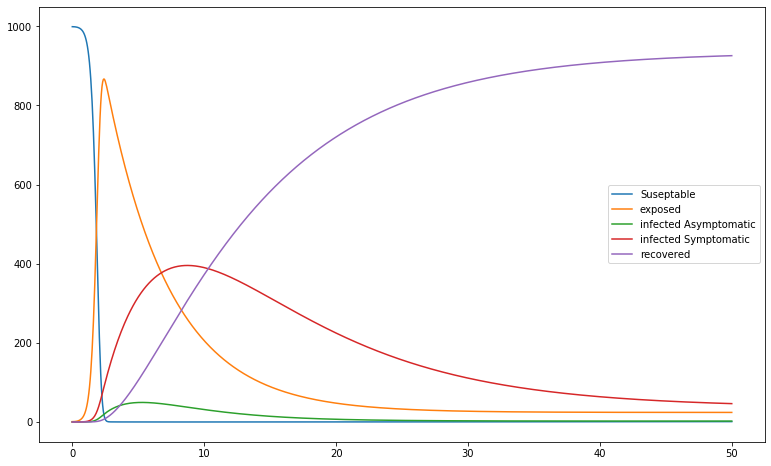

In [12]:
t= np.linspace(0,50, 1000)
##10000 points that are between 0 and 60
P0 = np.array([999,1,0, 0,0])
P =odeint(sys_eq_2b, P0, t)
S,E, IA,IS, R= P.T##this is then essentially the corresponding y pints given time
plt.figure(figsize=(13, 8))
plt.plot(t, S)
plt.plot(t, E)
plt.plot(t, IA)
plt.plot(t,IS)
plt.plot(t,R)
plt.legend(["Suseptable", "exposed","infected Asymptomatic", "infected Symptomatic", "recovered"])

To keep it simple we can add the code from 2a to have the generic model of S E I R that does not inlcude asymptomatic people, but to keep it consistent for comparison we will add include it when it has the demography.

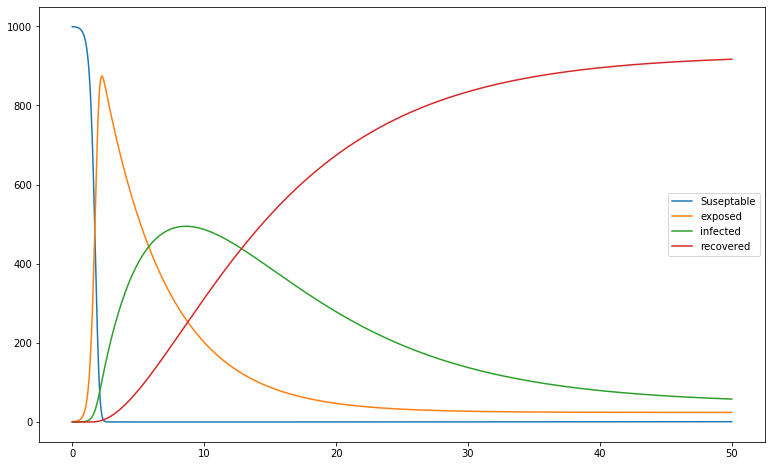

In [13]:
t= np.linspace(0,50, 1000)
##10000 points that are between 0 and 60
P0 = np.array([999,1, 0, 0])
P =odeint(sys_eq_2a, P0, t)
S,E, I, R= P.T##this is then essentially the corresponding y pints given time
plt.figure(figsize=(13, 8))
plt.plot(t, S)
plt.plot(t, E)
plt.plot(t,I)
plt.plot(t,R)
plt.legend(["Suseptable", "exposed","infected", "recovered"])